# オルツ ５分足

In [1]:
import sys
import os
try:
    __file__
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
except NameError:
    from pathlib import Path
    Path().resolve()
    sys.path.append(os.path.join(Path().resolve(), '..'))

import re

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.technical import psar

In [2]:
pattern = re.compile(r'(.+)\.T')

symbol = '260A.T'
ticker = yf.Ticker(symbol)

df = ticker.history(period='1d', interval='5m')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-03-05 09:00:00+09:00,565.0,566.0,565.0,566.0,0,0.0,0.0
2025-03-05 09:05:00+09:00,567.0,570.0,562.0,569.0,35000,0.0,0.0
2025-03-05 09:10:00+09:00,568.0,572.0,568.0,568.0,9100,0.0,0.0
2025-03-05 09:15:00+09:00,569.0,569.0,563.0,563.0,13400,0.0,0.0
2025-03-05 09:20:00+09:00,563.0,563.0,553.0,553.0,66800,0.0,0.0
2025-03-05 09:25:00+09:00,554.0,558.0,554.0,556.0,36200,0.0,0.0
2025-03-05 09:30:00+09:00,556.0,559.0,555.0,556.0,26700,0.0,0.0
2025-03-05 09:35:00+09:00,556.0,558.0,556.0,556.0,8000,0.0,0.0
2025-03-05 09:40:00+09:00,556.0,559.0,556.0,558.0,9300,0.0,0.0


## ローソク足チャートとパラボリック SAR

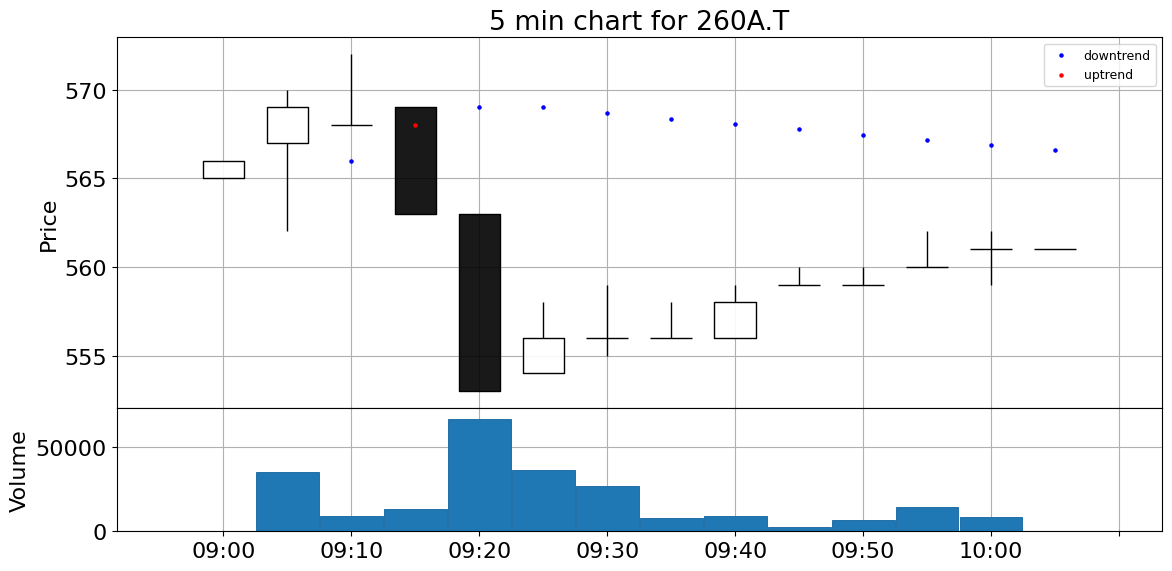

In [3]:
dict_psar = psar(df)

plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_subplot(111)
gs = fig.add_gridspec(
    2, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3, 1]
)

ax = dict()
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis

apds  = [
    mpf.make_addplot(
        dict_psar['bear'],
        type='scatter',
        marker='o',
        markersize=5,
        color='blue',
        label='downtrend',
        ax=ax[0]
    ),
    mpf.make_addplot(
        dict_psar['bull'],
        type='scatter',
        marker='o',
        markersize=5,
        color='red',
        label='uptrend',
        ax=ax[0]
    ),
] 

mpf.plot(
    df,
    type='candle',
    style='default',
    datetime_format='%H:%M',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
    volume=ax[1],
)

try:
    ax[0].set_title('5 min chart for %s (%s)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('5 min chart for %s' % symbol)

ax[0].grid()
ax[0].legend(loc='best', fontsize=9)

ax[1].grid()


plt.tight_layout()

m = pattern.match(symbol)
if m:
    plt.savefig('5min_chart_%s.png' % m.group(1))
else:
    plt.savefig('5min_chart_%s.png' % symbol)

plt.show()

In [4]:
df.tail(2)['Close']

Datetime
2025-03-05 09:00:00+09:00    566.0
2025-03-05 09:05:00+09:00    566.0
Name: Close, dtype: float64

In [5]:
df.tail(2)['Close'].diff()

Datetime
2025-03-05 09:00:00+09:00    NaN
2025-03-05 09:05:00+09:00    0.0
Name: Close, dtype: float64